In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

In [4]:
df2019 = pd.read_csv('C://Users/ILIFO/Desktop/Programming/8. mini_pro_따릉이/0724_따릉이_전데이터.csv')
df2019

df2019 = df2019.sort_values(by='대여일시' ,ascending=True)
df2019

,Unnamed: 0,대여일시,대여 대여소번호,대여_위도,대여_경도,반납일시,반납 대여소번호,반납_위도,반납_경도,대여소_구,month,대여시간,반납시간,요일,거치대수
4405800,4405800,2018-12-01 00:00:01,1357,37.612072,127.008133,2018-12-01 00:04:50,1360,37.603096,127.013504,성북구,12,0,0,Saturday,20
12572153,12572153,2018-12-01 00:00:01,2303,37.511517,127.021477,2018-12-01 00:06:07,2277,37.514870,127.015282,강남구,12,0,0,Saturday,15
13832971,13832971,2018-12-01 00:00:04,198,37.562138,126.963776,2018-12-01 00:09:32,348,37.572029,126.960785,서대문구,12,0,0,Saturday,15
12738051,12738051,2018-12-01 00:00:09,1139,37.536991,126.863365,2018-12-01 00:14:58,703,37.524063,126.875580,강서구,12,0,0,Saturday,8
7540993,7540993,2018-12-01 00:00:10,334,37.570599,126.991791,2018-12-01 00:07:58,359,37.576061,126.997681,종로구,12,0,0,Saturday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10258526,10258526,2019-11-30 23:59:54,1008,37.549549,127.127151,2019-12-01 00:09:06,1060,37.544659,127.132637,강동구,11,23,0,Saturday,10
10060216,10060216,2019-11-30 23:59:54,1210,37.513126,127.100960,2019-12-01 00:43:23,1008,37.549549,127.127151,송파구,11,23,0,Saturday,30
3956202,3956202,2019-11-30 23:59:55,589,37.544159,127.056656,2019-12-01 00:04:26,585,37.536808,127.055489,성동구,11,23,0,Saturday,8
4453346,4453346,2019-11-30 23:59:57,2239,37.494217,127.013786,2019-12-01 00:25:30,2217,37.513046,127.005959,서초구,11,23,0,Saturday,10


In [5]:
df2019['대여일시'] = pd.to_datetime(df2019['대여일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

df2019['year']       = df2019['대여일시'].dt.year         # 연(4자리숫자)
df2019['month']      = df2019['대여일시'].dt.month        # 월(숫자)
df2019['hour']       = df2019['대여일시'].dt.hour         # 시(숫자)

df2019

df2019_1 = df2019[['대여일시',	'대여 대여소번호', 'year', 'month', 'hour']]
df2019_1

,대여일시,대여 대여소번호,year,month,hour
4405800,2018-12-01 00:00:01,1357,2018,12,0
12572153,2018-12-01 00:00:01,2303,2018,12,0
13832971,2018-12-01 00:00:04,198,2018,12,0
12738051,2018-12-01 00:00:09,1139,2018,12,0
7540993,2018-12-01 00:00:10,334,2018,12,0
...,...,...,...,...,...
10258526,2019-11-30 23:59:54,1008,2019,11,23
10060216,2019-11-30 23:59:54,1210,2019,11,23
3956202,2019-11-30 23:59:55,589,2019,11,23
4453346,2019-11-30 23:59:57,2239,2019,11,23


In [11]:
df2019_grouped_m= df2019_1.groupby('month').count()
df2019_grouped_m['Count'] = df2019_grouped_m['year']

df2019_grouped_m = df2019_grouped_m.reindex(labels='month', index=[12,1,2,3,4,5,6,7,8,9,10,11])
df2019_grouped_m
# df2019_grouped.info()

,대여일시,대여 대여소번호,year,hour,Count
month,,,,,
12,492278,492278,492278,492278,492278
1,472005,472005,472005,472005,472005
2,465457,465457,465457,465457,465457
3,867675,867675,867675,867675,867675
4,1418347,1418347,1418347,1418347,1418347
5,2207994,2207994,2207994,2207994,2207994
6,2203506,2203506,2203506,2203506,2203506
7,2072938,2072938,2072938,2072938,2072938
8,2020748,2020748,2020748,2020748,2020748


(0, 3000000)

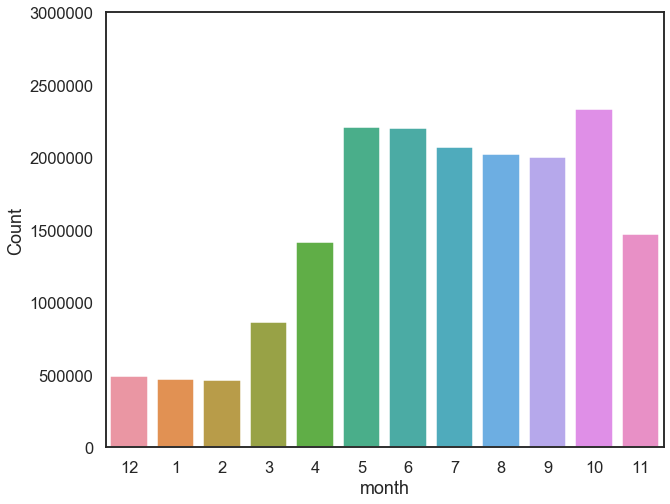

In [13]:
sns.set(style="white", context="talk")
plt.figure(figsize=(10, 8))
sns.barplot(data = df2019_grouped_m, x = df2019_grouped_m.index, y = "Count", order=[12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.ylim([0, 3000000]) # y축 범위 바꾸기

In [8]:
df2019_grouped_h = df2019_1.groupby('hour').count()
df2019_grouped_h

df2019_grouped_h['Count'] = df2019_grouped_h['year']
df2019_grouped_h
# # df2019_grouped.info()

,대여일시,대여 대여소번호,year,month,Count
hour,,,,,
0,588600,588600,588600,588600,588600
1,477123,477123,477123,477123,477123
2,335820,335820,335820,335820,335820
3,230652,230652,230652,230652,230652
4,143494,143494,143494,143494,143494
5,137400,137400,137400,137400,137400
6,256779,256779,256779,256779,256779
7,616308,616308,616308,616308,616308
8,1085825,1085825,1085825,1085825,1085825


(0, 2000000)

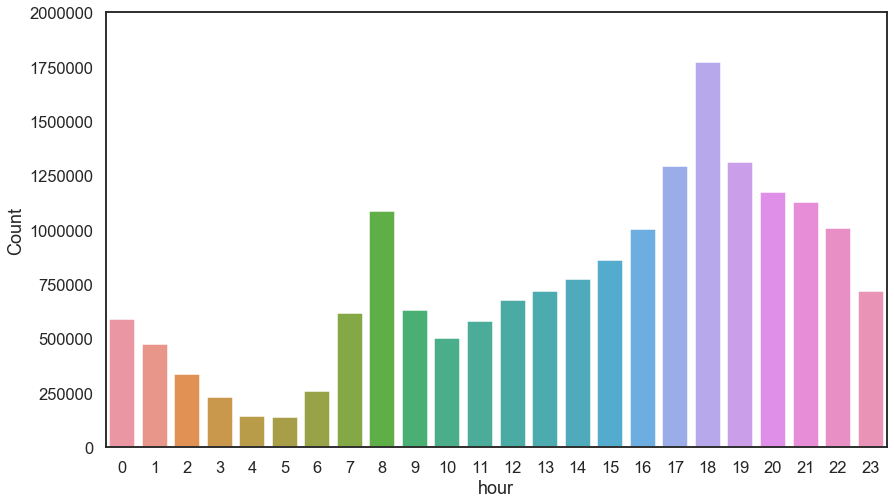

In [17]:
sns.set(style="white", context="talk")
plt.figure(figsize=(14, 8))
sns.barplot(data = df2019_grouped_h, x = df2019_grouped_h.index, y = "Count")
plt.ylim([0, 2000000]) # y축 범위 바꾸기